# Réseaux et protocoles de routage

## Définitions

### Routeur

Les routeurs sont des dispositifs qui permettent la communication entre les appareils terminaux se trouvant dans un réseau.

- On a les routeurs d'accès à un réseau dans lequel les machines sont reliées entre elles à l'aide de switchs eux-mêmes reliés au routeur.
- On a les routeurs d'interconnexion de réseau, c'est à dire des routeurs reliés à d'autres routeurs  pour interconnecter différents réseaux.

On appelle topologie d'un réseau l'interconnexion de ces routeurs entre eux et les différents réseaux qu'ils relient.

### Adressage IP

Le protocole IP (Internet Protocol) permet d'attribuer des adresses IPV 4 et/ou IPV 6 pour identifier chaque machine, de manière unique, sur un réseau. En IPv4, les adresses sont des séquences de 32 bits soit 4 octets.

Une adresse IP se constitue de 2 parties : 
- la partie **réseau** correspondant aux bits de poids fort (les plus à gauche);
- la partie **hote** qui identifie la machine et correspondant aux bits de poids faible (les plus à droite).

Les valeurs qui identifient les machines sur un réseau sont délimités par le masque de réseau de la forme 1...10...0 sur 32 bits. Dans ce masque, on a :

- Les bits égaux à 1 qui correspondent à la partie réseau ;
- Les bits égaux à 0 qui indiquent la plage d'adresse disponible pour les machines.

Le masque peut se noter sous la forme d'un quadruplet d'octets ou en notation CIDR donnant le nombre de bits égaux à 1.

#### Exemple

Une adresse réseau de valeur 192.168.1.0/24 correspond au masque 255.255.255.0

Cela signifie que l'on dispose de 256 adresses IP mais:

- une adresse IP est réservée pour la désignation réseau : 192.168.1.0
- une adresse IP est réservée pour la diffusion (broadcast) : 192.168.1.255

En conclusion, on aura au plus 254 adresses pour nos machines du réseau.

### Adresse réseau

Lorsque l'on connait l'adresse IP d'une machine et son masque, on peut déterminer l'adresse réseau en appliquant un ET logique entre les deux valeurs:

#### Exemple

L'adresse IP d'une machine est 10.124.24.83/28. À quelle réseau apartient-elle ?

On peut remarquer que le masque contient 28 bits égaux à 1 et 4 bits égaux à 0. Donc, on va disposer de $2^{4}=16$ adresses IP dans le réseau.

On convertit en binaire l'adresse IP et le masque et on applique un ET logique :

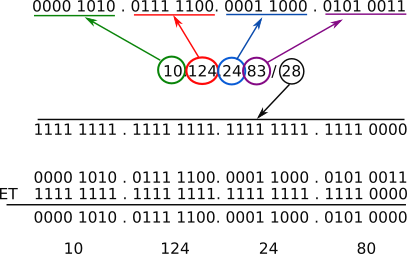

Donc l'adresse réseau est 10.124.24.80 et autorise 16 adresses IP.

## Topologie d'un réseau

La topologie d'un réseau est l'ensemble des équipements permettant la communication entre les réseaux. Il est donc constitué de routeurs, switch et toutes machines qui communiquent sur les réseaux.

### Exemple

On considère la topologie réseau suivante: 6 routeurs et 2 réseaux locaux.

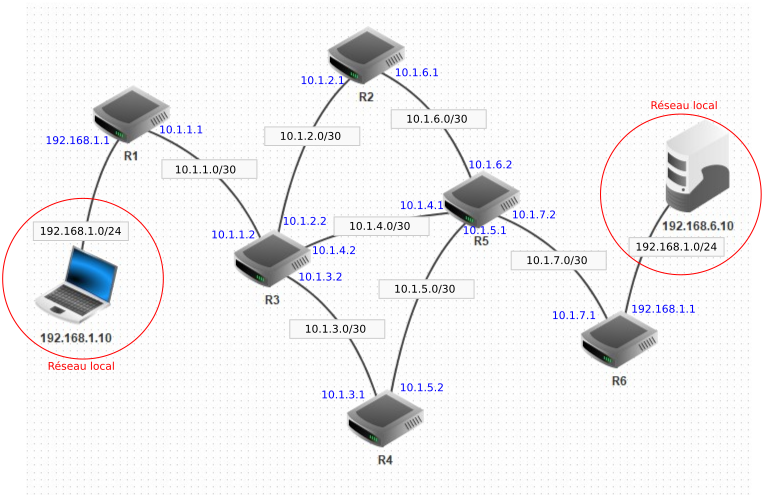

- Un réseau local qui a une adresse réseau de valeur 192.168.1.0/24. Le routeur R1 dispose d'une interface qui a une adresse IP dans ce réseau.

- L'adresse réseau entre les routeurs R1 et R3 a pour valeur 10.1.1.0/30. Le masque de réseau n'autorise que 3 adresses IP.


On peut représenter la topologie d'un réseau par un **graphe** dans lequel :

- Chaque **sommet** du graphe représente un routeur ou un réseau;
- Chaque arête du graphe représente une connexion entre 2 routeurs ou 2 réseaux.
- Chaque poids (lorsqu'il est donné) représente le coût ou la distance entre 2 routeurs ou 2 réseaux.

### Exemple

La topologie réseau de l'exemple précédent peut se représenter par le graphe.

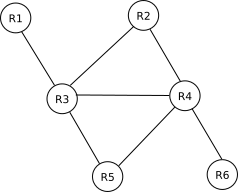

Ici le **graphe** a 6 **sommets** et 7 **arêtes**.

- Les **sommets** du graphe représentent les routeurs R1, R2, R3, R4, R5 et R6.
- Les **arêtes** représentes les liens entre les routeurs.

## Table de routage

Chaque routeur enregistre des informations sur le réseau. Parmi ces informations, on a:

- les adresses IP de ses interfaces,
- les adresses IP des interfaces des routeurs auxquelles il est relié appelées **passerelles**,
- les destination réseaux qu'il peut atteindre sous forme d'adresse réseau,
- la distance ou le coû
t pour accéder à un routeur

Ces informations sont rassemblées dans une **table de routage**.

### Exemple

En reprenant le réseau ci-dessus:

Table de routage du routeur R1

|réseau destination| passerelle | interface |
|:----------------:|:----------:|:---------:|
|192.168.1.0/24|192.168.1.1|192.168.1.1|
|10.1.1.0/30|10.1.1.2|10.1.1.1|
|192.168.6.0/24|10.1.1.2|10.1.1.1|

Table de routage du routeur R3

|réseau destination| passerelle | interface |
|:----------------:|:----------:|:---------:|
|192.168.1.0/24|10.1.1.1|10.1.1.2|
|10.1.1.0/30|10.1.1.1|10.1.1.2|
|10.1.2.0/24|10.1.2.1|10.1.2.2|
|192.168.6.0/24|10.1.4.1|10.1.4.2|

## Protocole de routage


Les routeurs utilisent un protocole pour communiquer entre eux, assurant ainsi l'acheminement des données entre les machines de deux réseaux distants.

Chaque routeur a une connaissance du réseau auquel il appartient. 

Chaque machine contient aussi une table de routage qui mémorise les adresses réseaux avec lesquelles elles communiquent. Cette table peut être affichée avec la commande **arp**.


### Protocoles

Un protocole est un ensemble de règles qui permettent à 2 machines de communiquer, c'est à dire s'envoyer et recevoir des données. Il existe de nombreux protocoles pour le routage. On s'intéressera à deux d'entre eux qui sont **RIP** et **OSPF**.

Les tables de routages sont régulièrement mises à jour grâce à des algorithmes:

- Le protocole RIP utilise l'algorithme de Bellman-Ford pour découvrir la topologie du réseau.
- Le protocole OSPF utilise l'algorithme de Dijkstra pour déterminer la route la plus rapide

## Protocole RIP

Le protocole **RIP** (Routing information protocol) repose sur la métrique ou la distance entre 2 routeurs. Il mémorise dans sa table de routage le nombre de sauts nécessaires, soit le nombre de routeurs à traverser pour parvenir jusqu'au routeur souhaité.

Ensuite, il échange régulièrement sa table avec ses voisins et complète ou met à jour sa table de routage avec les informations détenues par les routeurs voisins.

Au bout d'un certain temps, la table de routage d'un routeur se stabilise et dispose des informations sur tout le réseau.



### Exemple

Table de routage du routeur R1 après avoir découvert la topologie du réseau (ci-dessus).

|réseau destination| passerelle | interface |distance/métrique|
|:----------------:|:----------:|:---------:|:---------------:|
|192.168.1.0/24|192.168.1.1|192.168.1.1|0|
|10.1.1.0/30|10.1.1.2|10.1.1.1|0|
|10.1.2.0/30|10.1.1.2|10.1.1.1|1|
|10.1.3.0/30|10.1.1.2|10.1.1.1|1|
|10.1.4.0/30|10.1.1.2|10.1.1.1|1|
|10.1.6.0/30|10.1.1.2|10.1.1.1|2|
|10.1.6.0/30|10.1.1.2|10.1.1.1|2|
|10.1.7.0/30|10.1.1.2|10.1.1.1|2|
|192.168.6.0/24|10.1.1.2|10.1.1.1|3|

### Remarque

La métrique peut démarrer à 1, ce qui revient à compter le nombre de liens entre les routeurs.

### Règles du protocole RIP

Un routeur qui reçoit les informations d'un routeur voisin suit les règles du protocole RIP:

- il découvre une nouvelle route inconnue vers un sous réseau inconnu, il ajoute à sa table;
- Il découvre une route plus courte vers un sous-réseau connu, mais passant par un nouveau routeur. L'ancienne route est remplacée par la nouvelle;
- Il reçoit une nouvelle route plus longue vers un sous-réseau connu, il l'ignore;
- Il reçoit une route plus longue vers un routeur passant par le même voisin, cela signifie qu'un problème est survenu sur l'ancienne route. Il met à jour sa table avec cette nouvelle route.

Lorsqu'un routeur reçoit une route, il faut augmenter la distance de 1, soit pour la comparer aux autres routes, soit pour l'ajouter à sa table. Les distances indiquent le nombre de routeurs traversés pour accéder à un sous réseau.

Lorsque la distance est supérieure à 15, la route est effacée de la table.


#### Détection de panne

Lorsqu'une panne survient sur le réseau, comme la rupture de communication entre 2 routeurs, les routeurs qui perdent la connexion envoient l'information aux autres routeurs avec un coût supérieur à 15 (en général 16) pour que les autres routeurs mettent à jour leurs tables. Il remplacent la route rompue par une autre route, certes plus longue que l'ancienne, mais qui permet d'acheminer les données.

## Protocole OSPF

Le protocole **OSPF** (Open Shortest Path First) est adapté pour de très grands réseaux. Les réseaux sont découpés en zones et le protocole OSPF gère chaque zone. Ensuite il gère le routage entre les zones.

La principale différence avec le protocole RIP est dans la prise en compte de la rapidité de transmission de l'information. L'algorithme de Dijkstra permet de déterminer la route la plus courte entre 2 routeurs.

Les routeurs échangent leurs informations et mettent à jour leurs tables de routage.

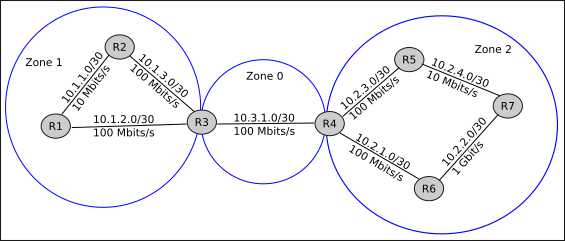

### Coût d'une liaison

Le protocole OSPF calcule le coût d'une liaison avec ses routeurs voisins. 

Le coût est fixé à $\dfrac{10^{8}}{d}$ où $d$ est le débit de la liaison donnée en bit par seconde (bit/s).

La valeur $10^{8}$ peut être différente mais mais elle sera appliquée à tous les routeurs et ne change en rien les calculs.

### Exemple

Reprenons l'exemple précédent :

Le **débit** entre le routeur R1 et R2 est de $10$ Mbits/s soit $10 \times 10^{6}$ bits/s = $10^{7}$ bits/s.

Le **coût** est donc $\dfrac{10^{8}}{10^{7}}=10$

On peut représenter le réseau par un graphe en ajoutant à chaque arête le coût de chaque liaison (poids). 

### Algorithme de Dijkstra

Dans les réseaux importants, avec de nombreux routeurs, la détermination de la route la moins couteuse se fait avec l'algorithme de Dijkstra.

Considérons le graphe ci-dessous représentant un réseau:

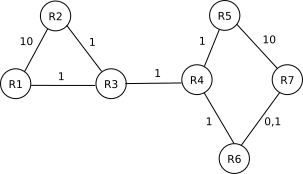

Appliquons l'algorithme de Dijkstra pour trouver la route la moins couteuse:

| R1 | R2 | R3 | R4 | R5 | R6 | R7 |Sommet fixé|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:---------:|
|$$0$$|$$\infty$$|$$\infty$$|$$\infty$$|$$\infty$$|$$\infty$$|$$\infty$$|R1(0)|
||$$10_{R1}$$|$$1_{R1}$$|$$\infty$$|$$\infty$$|$$\infty$$|$$\infty$$|R3(1)|
||$$2_{R3}$$||$$2_{R3}$$|$$\infty$$|$$\infty$$|$$\infty$$|R2(2)|
||||$$2_{R3}$$|$$\infty$$|$$\infty$$|$$\infty$$|R4(2)|
|||||$$3_{R4}$$|$$3_{R4}$$|$$\infty$$|R5(3)|
||||||$$3_{R4}$$|$$13_{R5}$$|R6(3)|
|||||||$$3,1_{R6}$$|R7(3,1)|


La route la plus courte est donc $R1 \longmapsto R3 \longmapsto R4 \longmapsto R6 \longmapsto R7$ qui a un coût de $3,1$.